# Fetching MEIs from the database

add database.user and database.password in the following dict

In [31]:
import datajoint as dj
import os

import numpy as np
import torch

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
nnfabrik_mei = dj.create_virtual_module('nnfabrik_mei', 'nnfabrik_color_mei')

In [7]:
key = dict(dataset_hash='5f7e057a90a85e2f6feed6936f759a56')

# Model Performance: Single trial validation correlation

In [8]:
nnfabrik_mei.TrainedModel & key

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
nndichromacy.models.se_core_full_gauss_readout,a09d55344b5793137349b8ca5d17d46d,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,nndichromacy.training.standart_trainer,0d06f037501e129d11aa288d8f22788f,1000,standard_trainer.full_gauss_cortex.22564-2-12_normalized_images,0.358977,=BLOB=,kwilleke,2020-06-16 14:03:40
nndichromacy.models.se_core_full_gauss_readout,a09d55344b5793137349b8ca5d17d46d,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,nndichromacy.training.standart_trainer,0d06f037501e129d11aa288d8f22788f,2000,standard_trainer.full_gauss_cortex.22564-2-12_normalized_images,0.357289,=BLOB=,kwilleke,2020-06-16 14:07:16
nndichromacy.models.se_core_full_gauss_readout,a09d55344b5793137349b8ca5d17d46d,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,nndichromacy.training.standart_trainer,0d06f037501e129d11aa288d8f22788f,3000,standard_trainer.full_gauss_cortex.22564-2-12_normalized_images,0.360409,=BLOB=,kwilleke,2020-06-16 14:10:49
nndichromacy.models.se_core_full_gauss_readout,a09d55344b5793137349b8ca5d17d46d,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,nndichromacy.training.standart_trainer,0d06f037501e129d11aa288d8f22788f,4000,standard_trainer.full_gauss_cortex.22564-2-12_normalized_images,0.354436,=BLOB=,kwilleke,2020-06-16 14:13:48
nndichromacy.models.se_core_full_gauss_readout,a09d55344b5793137349b8ca5d17d46d,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,nndichromacy.training.standart_trainer,0d06f037501e129d11aa288d8f22788f,5000,standard_trainer.full_gauss_cortex.22564-2-12_normalized_images,0.356899,=BLOB=,kwilleke,2020-06-16 14:17:51


# MEI table

contains the `unit_ids` as in neurons.unit_ids

In [9]:
nnfabrik_mei.MEI() & key

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,10,22564-2-12-0,1,=BLOB=,5.46641,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,17,22564-2-12-0,1,=BLOB=,3.89513,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,20,22564-2-12-0,1,=BLOB=,1.87474,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,21,22564-2-12-0,1,=BLOB=,5.01626,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,38,22564-2-12-0,1,=BLOB=,5.18357,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,41,22564-2-12-0,1,=BLOB=,3.61029,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,55,22564-2-12-0,1,=BLOB=,3.34447,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,59,22564-2-12-0,1,=BLOB=,4.62988,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,61,22564-2-12-0,1,=BLOB=,5.40982,=BLOB=
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,73,22564-2-12-0,1,=BLOB=,4.02022,=BLOB=


#### MEI table & the units table


contains the neurons index, along with the unit id

In [10]:
nnfabrik_mei.MEI() * nnfabrik_mei.MEISelector & key

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function,unit_index integer position of the neuron in the model's output
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,10,22564-2-12-0,1,=BLOB=,5.46641,=BLOB=,9
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,17,22564-2-12-0,1,=BLOB=,3.89513,=BLOB=,15
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,20,22564-2-12-0,1,=BLOB=,1.87474,=BLOB=,18
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,21,22564-2-12-0,1,=BLOB=,5.01626,=BLOB=,19
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,38,22564-2-12-0,1,=BLOB=,5.18357,=BLOB=,32
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,41,22564-2-12-0,1,=BLOB=,3.61029,=BLOB=,35
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,55,22564-2-12-0,1,=BLOB=,3.34447,=BLOB=,47
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,59,22564-2-12-0,1,=BLOB=,4.62988,=BLOB=,50
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,61,22564-2-12-0,1,=BLOB=,5.40982,=BLOB=,52
featurevis.methods.gradient_ascent,e203277aa2540dd9f907344ed5babb21,nndichromacy.datasets.static_loaders,5f7e057a90a85e2f6feed6936f759a56,8521f2f7dfaed9760c678cef61f9d355,73,22564-2-12-0,1,=BLOB=,4.02022,=BLOB=,63


# Fetching the MEI + fetching the activations during optimization

In [23]:
# fetch the meis and outputs for 10 example neurons
mei_paths, output_paths = (nnfabrik_mei.MEI() & key).fetch("mei", "output", limit=10)

In [26]:
# the entries of "mei" and "output" are paths, when calling torch.load() on these paths, the MEI tensor is loaded
mei_paths[0]

'mei_HAmuzNobfcJJLnOTueSJTRTGtVeHqeXq.pth.tar'

In [24]:
# loading all MEIs of the paths that we fetched
MEIs = np.stack([torch.load(path).detach().cpu().numpy().squeeze() for path in mei_paths])
evaluations = np.stack([torch.load(path)['featurevis.objectives.EvaluationObjective']["values"] for path in output_paths])
t_evaluations = np.stack([torch.load(path)['featurevis.objectives.EvaluationObjective']["times"] for path in output_paths])

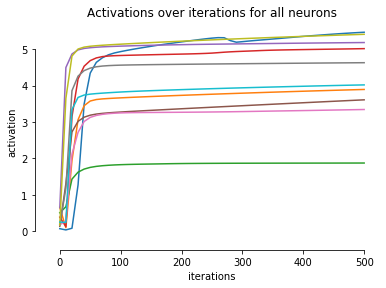

In [25]:
plt.plot(t_evaluations.T, evaluations.T)
sns.despine(trim=True, offset=10)
plt.xlabel("iterations")
plt.ylabel("activation")
plt.title("Activations over iterations for all neurons");

# Fetching all MEIs

In [ ]:
# fetching all 2000 MEIs from the database will take about 15min

In [ ]:
mei_paths, unit_indices, unit_ids = (nnfabrik_mei.MEI() * nnfabrik_mei.MEISelector() & key).fetch("mei", "unit_index", "unit_id")

In [ ]:
MEIs = np.stack([torch.load(path).detach().cpu().numpy().squeeze() for path in mei_paths])

now you have all `MEIs` and `unit_ids` as two matching lists

# Cleaning up the folder

In [ ]:
# when you fetch the mei, the files will be copied to the notebook location. After you fetched them, and laoded the MEIs, you can delete the files again

In [32]:
for i, path in enumerate(mei_paths):
    if os.path.exists(os.path.join(os.getcwd(), path)):
        os.remove(os.path.join(os.getcwd(), path))
        
for i, path in enumerate(output_paths):
    if os.path.exists(os.path.join(os.getcwd(), path)):
        os.remove(os.path.join(os.getcwd(), path))